# Load metadata

In [1]:
   
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

# read the metadate of all files
path = "./Best_of/"
metadata = pd.read_csv(path + 'data.csv')
metadata.head(11)

,file_name,folder,common_name,scientific_name
0,61025001.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
1,61025002.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
2,61025003.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
3,61025004.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
4,61025006.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
5,61025007.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
6,61025008.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
7,61025009.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
8,6102500A.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
9,6102500B.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis


# Clean Data
## Show duplicated files

In [2]:
# show the files that are same but exsist in different folder of species
duplicated_files = metadata[metadata["file_name"].duplicated(keep=False)]
duplicated_files.shape

(50, 4)

## Drop duplicates

In [3]:
# get a copy of raw data
raw_metadata = metadata.copy()
# delete the duplicated rows
metadata = metadata.drop_duplicates("file_name", keep=False)
metadata

,file_name,folder,common_name,scientific_name
0,61025001.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
1,61025002.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
2,61025003.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
3,61025004.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
4,61025006.wav,Atlantic Spotted Dolphin (Stenella frontalis) 58,Atlantic Spotted Dolphin,Stenella frontalis
...,...,...,...,...
1692,79006015.wav,White-sided Dolphin (Lagenorhynchus acutus) 55,White-sided Dolphin,Lagenorhynchus acutus
1693,79006016.wav,White-sided Dolphin (Lagenorhynchus acutus) 55,White-sided Dolphin,Lagenorhynchus acutus
1694,79006017.wav,White-sided Dolphin (Lagenorhynchus acutus) 55,White-sided Dolphin,Lagenorhynchus acutus
1695,79006018.wav,White-sided Dolphin (Lagenorhynchus acutus) 55,White-sided Dolphin,Lagenorhynchus acutus


## Drop Species with Insufficient Data

In [4]:
# list the counts of audio files of all classes
value_counts = metadata.common_name.value_counts()
value_counts

# drop classes that has counts less than 20
metadata = metadata[~metadata['common_name'].isin(value_counts[value_counts < 20].index)]

Spinner Dolphin                       114
Fraser's Dolphin                       87
Striped Dolphin                        81
Risso's Dolphin                        67
Short-Finned (Pacific) Pilot Whale     65
Long-Finned Pilot Whale                65
Pantropical Spotted Dolphin            65
Humpback Whale                         64
Clymene Dolphin                        63
Sperm Whale                            60
False Killer Whale                     59
Atlantic Spotted Dolphin               58
White-beaked Dolphin                   57
Melon Headed Whale                     56
White-sided Dolphin                    55
Northern Right Whale                   54
Common Dolphin                         52
Ross Seal                              50
White Whale                            50
Narwhal                                50
Finback Whale                          50
Bowhead Whale                          50
Rough-Toothed Dolphin                  50
Harp Seal                         

# Play audio / Draw waveform

<Figure size 864x288 with 0 Axes>

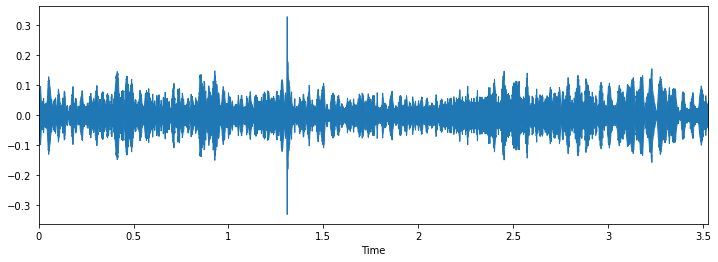

In [7]:
test_data = metadata.iloc[0]
test_file_path1 = path + test_data.folder+"/"+test_data.file_name
# showcase one of the audio
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(test_file_path1)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(test_file_path1)

<Figure size 864x288 with 0 Axes>

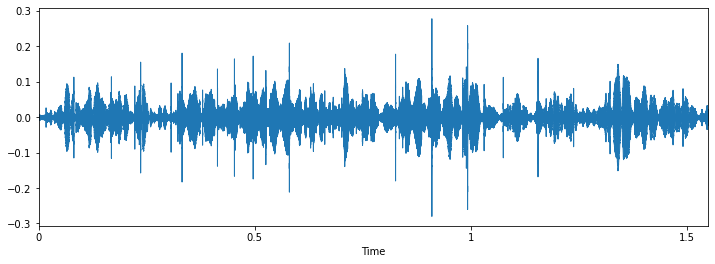

In [8]:
test_data = metadata.iloc[100]
test_file_path2 = path + test_data.folder+"/"+test_data.file_name
# showcase one of the audio
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(test_file_path2)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(test_file_path2)

<Figure size 864x288 with 0 Axes>

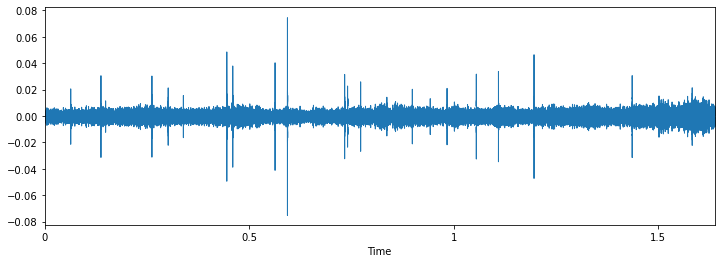

In [9]:
test_data = metadata.iloc[1500]
test_file_path3 = path + test_data.folder+"/"+test_data.file_name
# showcase one of the audio
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(test_file_path3)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(test_file_path3)

# Extract audio properties

## Get all properties

In [20]:
import wavfilehelper
from tqdm.notebook import tqdm
# use a helper to read the properties of audio files
wavfilehelper = wavfilehelper.WavFileHelper()

audiodata = []
# extract the properties all auido files

for index, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    file_path = path + row["folder"]+"/"+row["file_name"]
    data = wavfilehelper.read_file_properties(file_path)
    audiodata.append(data)

# Convert into a Pandas dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])
audiodf

,num_channels,sample_rate,bit_depth
0,1,43900,16
1,1,43900,16
2,1,43900,16
3,1,43900,16
4,1,43900,16
...,...,...,...
1613,1,81920,16
1614,1,81920,16
1615,1,81920,16
1616,1,81920,16


## Distribution of channel number

In [9]:
#distribution of channel number
audiodf.num_channels.value_counts(normalize=True).rename_axis('channel nums').reset_index(name='ratio')

,channel nums,ratio
0,1,1.0


## Distribution of sample rate

In [10]:
#distribution of sample rate
audiodf.sample_rate.value_counts(normalize=True).rename_axis('sample rate').reset_index(name='ratio')

,sample rate,ratio
0,81920,0.269468
1,80000,0.141533
2,60600,0.110630
3,81600,0.060569
4,14900,0.041409
5,10000,0.038937
6,20000,0.038319
7,10240,0.038319
8,30000,0.033375
9,166600,0.032756


## Distribution of bit depth

In [11]:
#distribution of bit_depth
audiodf.bit_depth.value_counts(normalize=True).rename_axis('bit depth').reset_index(name='ratio')

,bit depth,ratio
0,16,0.993820
1,8,0.005562
2,12,0.000618


# Normalize audio properties
## Original properties

In [12]:
from scipy.io import wavfile as wav
import numpy as np

scipy_sample_rate, scipy_audio = wav.read(test_file_path1) 
print('Original sample rate 1:', scipy_sample_rate)
print('Original audio file 1 min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))

scipy_sample_rate, scipy_audio = wav.read(test_file_path2) 
print('Original sample rate 2:', scipy_sample_rate)
print('Original audio file 2 min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))

scipy_sample_rate, scipy_audio = wav.read(test_file_path3) 
print('Original sample rate 3:', scipy_sample_rate)
print('Original audio file 3 min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))

Original sample rate 1: 43900
Original audio file 1 min~max range: -10912 to 6000
Original sample rate 2: 80000
Original audio file 2 min~max range: -4272 to 19344
Original sample rate 3: 20480
Original audio file 3 min~max range: -19744 to 25296


## Normalized properties
Using librosa to load audio files will normalize their sample rate to 22050, and their range of bit-depths to -1~1.

In [13]:
librosa_audio1, librosa_sample_rate1 = librosa.load(test_file_path1)
print('Librosa sample rate 1:', librosa_sample_rate1) 
print('Librosa audio file 1 min~max range:', np.min(librosa_audio1), 'to', np.max(librosa_audio1))

librosa_audio2, librosa_sample_rate2 = librosa.load(test_file_path2)
print('Librosa sample rate 2:', librosa_sample_rate2) 
print('Librosa audio file 2 min~max range:', np.min(librosa_audio2), 'to', np.max(librosa_audio2))

librosa_audio3, librosa_sample_rate3 = librosa.load(test_file_path3)
print('Librosa sample rate 3:', librosa_sample_rate3) 
print('Librosa audio file 3 min~max range:', np.min(librosa_audio3), 'to', np.max(librosa_audio3))

Librosa sample rate 1: 22050
Librosa audio file 1 min~max range: -0.3292361 to 0.17845193
Librosa sample rate 2: 22050
Librosa audio file 2 min~max range: -0.1283525 to 0.5903205
Librosa sample rate 3: 22050
Librosa audio file 3 min~max range: -0.56842196 to 0.77678907


# Extract MFCC feature
## MFCC for sample audio

(40, 152)

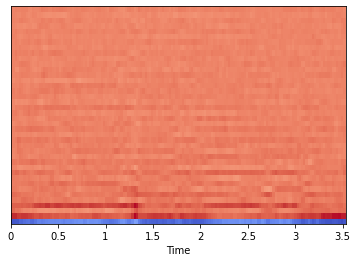

In [12]:
mfccs1 = librosa.feature.mfcc(y=librosa_audio1, n_mfcc=40)
mfccs1.shape
librosa.display.specshow(mfccs1, x_axis='time')

(40, 74)

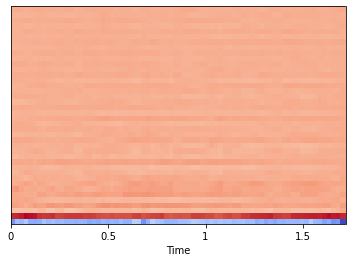

In [15]:
mfccs2 = librosa.feature.mfcc(y=librosa_audio2, n_mfcc=40)
mfccs2.shape
librosa.display.specshow(mfccs2, x_axis='time')

(40, 322)

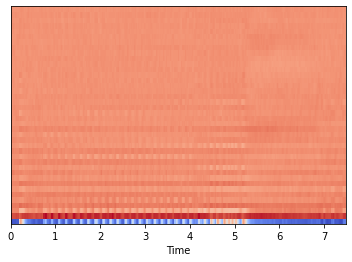

In [16]:
mfccs3 = librosa.feature.mfcc(y=librosa_audio3, n_mfcc=40)
mfccs3.shape
librosa.display.specshow(mfccs3, x_axis='time')

## MFCC for all audio files

In [17]:
def extract_MFCC(file_path):
   
    try:
        audio, sample_rate = librosa.load(file_path) 
        mfccs = librosa.feature.mfcc(y=audio, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_path)
        return None 
     
    return mfccsscaled

In [18]:
features = []
# extract the properties all auido files
for index, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    file_path = path + row["folder"]+"/"+row["file_name"]
    class_label = row["common_name"]
    data = extract_MFCC(file_path)
    features.append([data, class_label])
    
MFCC_df = pd.DataFrame(features, columns=['MFCC','class_label'])
MFCC_df

D:\Python\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1184
  warnings.warn(
D:\Python\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1460
  warnings.warn(
D:\Python\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1812
  warnings.warn(
D:\Python\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1448
  warnings.warn(


,MFCC,class_label
0,"[-267.63034, 44.246216, 7.417145, 41.1478, 8.3...",Atlantic Spotted Dolphin
1,"[-264.33713, 40.970325, 26.28316, 22.650043, 1...",Atlantic Spotted Dolphin
2,"[-270.84164, 45.36312, 30.27132, 25.993517, 9....",Atlantic Spotted Dolphin
3,"[-239.04887, 16.58756, 5.6849847, 60.08927, 1....",Atlantic Spotted Dolphin
4,"[-261.11877, 46.700287, 2.229831, 46.741135, 7...",Atlantic Spotted Dolphin
...,...,...
1613,"[-189.32501, 41.65219, -33.833813, -22.622475,...",White-sided Dolphin
1614,"[-179.45438, 23.963741, -27.340471, -31.353207...",White-sided Dolphin
1615,"[-192.41606, 26.796412, -31.112402, -22.374115...",White-sided Dolphin
1616,"[-196.49988, 36.064262, -35.29801, -25.686985,...",White-sided Dolphin


In [19]:
%store MFCC_df

Stored 'MFCC_df' (DataFrame)
